In [2]:
%matplotlib inline

In [1]:
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
import yellowbrick as yb

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv('data/CrimeData.csv', dtype={'BlockGroup': object})

In [4]:
data.head()

,Unnamed: 0,year,month,day,tod,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,Weekday,CrimeRate,CrimeCategory,BlockGroup,BlockGroupFreq,BlockGroupCategory
0,0,2013,1,10,Early Morning,1,44.43,0.34,27.77,0.52,0.0000,0.00,1031.65,44.43,0.0,5.77,330.0,2.49,0.74,1240.0,109147.0,104083.0,37.0,743.0,2013-01-10 04:30:00,3.0,80.645161,Med,0001001,0.086602,0.0
1,1,2013,1,30,Night,1,57.28,0.98,55.38,0.93,0.1323,0.99,996.10,57.28,0.0,3.57,110.0,4.92,1.33,1240.0,109147.0,104083.0,37.0,743.0,2013-01-30 22:30:00,2.0,80.645161,Med,0001001,0.086602,0.0
2,2,2013,2,4,Evening,1,32.68,0.91,18.64,0.56,0.0000,0.00,1015.17,32.68,0.0,6.67,161.0,1.22,0.36,1240.0,109147.0,104083.0,37.0,743.0,2013-02-04 17:30:00,0.0,80.645161,Med,0001001,0.086602,0.0
3,3,2013,2,14,Afternoon,1,43.85,0.00,28.66,0.55,0.0053,0.22,1016.32,43.85,4.0,6.54,305.0,6.58,2.49,1240.0,109147.0,104083.0,37.0,743.0,2013-02-14 15:00:00,3.0,80.645161,Med,0001001,0.086602,0.0
4,4,2013,3,8,Afternoon,1,44.84,0.72,27.55,0.44,0.0000,0.00,1020.88,48.26,1.0,6.40,339.0,16.90,7.55,1240.0,109147.0,104083.0,37.0,743.0,2013-03-08 15:00:00,4.0,80.645161,Med,0001001,0.086602,0.0


In [63]:
data2 = pd.get_dummies(data, prefix=['wkday'], columns=['Weekday'])
data2 = pd.get_dummies(data2, prefix=['tod'], columns=['tod'])
data2 = pd.get_dummies(data2, prefix=['bgCat'], columns=['BlockGroupCategory'])
data2 = pd.get_dummies(data2, prefix=['Year'], columns=['year'])
data2 = pd.get_dummies(data2, prefix=['Month'], columns=['month'])

In [64]:
data2.head(200)

,Unnamed: 0,day,offensegroup,apparent_temp,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_gust,wind_speed,TotalPop,PerCapitaIncome,MedianHouseholdInc,MedianAge,HousingUnits,Date,CrimeRate,CrimeCategory,BlockGroup,BlockGroupFreq,wkday_0.0,wkday_1.0,wkday_2.0,wkday_3.0,wkday_4.0,wkday_5.0,wkday_6.0,tod_Afternoon,tod_Early Morning,tod_Evening,tod_Midnight,tod_Morning,tod_Night,bgCat_0.0,bgCat_1.0,bgCat_2.0,bgCat_3.0,bgCat_4.0,bgCat_5.0,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,10,1,44.430,0.340,27.770,0.520,0.0000,0.00,1031.650,44.430,0.0,5.77,330.0,2.49,0.740,1240.0,109147.0,104083.0,37.0,743.0,2013-01-10 04:30:00,80.645161,Med,0001001,0.086602,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,30,1,57.280,0.980,55.380,0.930,0.1323,0.99,996.100,57.280,0.0,3.57,110.0,4.92,1.330,1240.0,109147.0,104083.0,37.0,743.0,2013-01-30 22:30:00,80.645161,Med,0001001,0.086602,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,4,1,32.680,0.910,18.640,0.560,0.0000,0.00,1015.170,32.680,0.0,6.67,161.0,1.22,0.360,1240.0,109147.0,104083.0,37.0,743.0,2013-02-04 17:30:00,80.645161,Med,0001001,0.086602,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,14,1,43.850,0.000,28.660,0.550,0.0053,0.22,1016.320,43.850,4.0,6.54,305.0,6.58,2.490,1240.0,109147.0,104083.0,37.0,743.0,2013-02-14 15:00:00,80.645161,Med,0001001,0.086602,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,8,1,44.840,0.720,27.550,0.440,0.0000,0.00,1020.880,48.260,1.0,6.40,339.0,16.90,7.550,1240.0,109147.0,104083.0,37.0,743.0,2013-03-08 15:00:00,80.645161,Med,0001001,0.086602,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,5,19,1,57.090,0.200,35.080,0.430,0.0000,0.00,1006.700,57.090,4.0,6.27,261.0,12.19,4.200,1240.0,109147.0,104083.0,37.0,743.0,2013-03-19 15:00:00,80.645161,Med,0001001,0.086602,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,6,19,1,36.650,1.000,34.970,0.940,0.0000,0.00,1008.870,36.650,0.0,4.64,294.0,2.05,0.670,1240.0,109147.0,104083.0,37.0,743.0,2013-03-19 09:00:00,80.645161,Med,0001001,0.086602,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,7,3,1,41.220,0.050,11.290,0.260,0.0000,0.00,1026.440,43.770,0.0,6.64,346.0,12.73,4.560,1240.0,109147.0,104083.0,37.0,743.0,2013-04-03 17:30:00,80.645161,Med,0001001,0.086602,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,8,11,1,82.130,0.110,58.430,0.450,0.0000,0.00,1010.660,82.110,8.0,6.52,144.0,6.63,1.940,1240.0,109147.0,104083.0,37.0,743.0,2013-04-11 15:00:00,80.645161,Med,0001001,0.086602,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,9,8,1,61.690,0.940,54.940,0.790,0.0157,0.55,1014.600,61.690,3.0,6.55,191.0,5.77,1.240,1240.0,109147.0,104083.0,37.0,743.0,2013-05-08 15:00:00,80.645161,Med,0001001,0.086602,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
cols = list(data2.columns)
cols

['Unnamed: 0',
 'day',
 'offensegroup',
 'apparent_temp',
 'cloud_cover',
 'dew_point',
 'humidity',
 'percip_intensity',
 'percip_probability',
 'pressure',
 'temperature',
 'uv_index',
 'visibility',
 'wind_bearing',
 'wind_gust',
 'wind_speed',
 'TotalPop',
 'PerCapitaIncome',
 'MedianHouseholdInc',
 'MedianAge',
 'HousingUnits',
 'Date',
 'CrimeRate',
 'CrimeCategory',
 'BlockGroup',
 'BlockGroupFreq',
 'wkday_0.0',
 'wkday_1.0',
 'wkday_2.0',
 'wkday_3.0',
 'wkday_4.0',
 'wkday_5.0',
 'wkday_6.0',
 'tod_Afternoon',
 'tod_Early Morning',
 'tod_Evening',
 'tod_Midnight',
 'tod_Morning',
 'tod_Night',
 'bgCat_0.0',
 'bgCat_1.0',
 'bgCat_2.0',
 'bgCat_3.0',
 'bgCat_4.0',
 'bgCat_5.0',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12']

In [66]:
data3 = data2.drop(columns = ['Unnamed: 0', 'offensegroup', 'BlockGroup', 'TotalPop', 'PerCapitaIncome', 
                              'MedianHouseholdInc', 'MedianAge', 'HousingUnits', 'apparent_temp', 'wind_gust']) 

In [67]:
cols = list(data3.columns)
cols

['day',
 'cloud_cover',
 'dew_point',
 'humidity',
 'percip_intensity',
 'percip_probability',
 'pressure',
 'temperature',
 'uv_index',
 'visibility',
 'wind_bearing',
 'wind_speed',
 'Date',
 'CrimeRate',
 'CrimeCategory',
 'BlockGroupFreq',
 'wkday_0.0',
 'wkday_1.0',
 'wkday_2.0',
 'wkday_3.0',
 'wkday_4.0',
 'wkday_5.0',
 'wkday_6.0',
 'tod_Afternoon',
 'tod_Early Morning',
 'tod_Evening',
 'tod_Midnight',
 'tod_Morning',
 'tod_Night',
 'bgCat_0.0',
 'bgCat_1.0',
 'bgCat_2.0',
 'bgCat_3.0',
 'bgCat_4.0',
 'bgCat_5.0',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12']

In [92]:
y1 = data3.CrimeRate
y2 = data3.CrimeCategory

In [109]:
y1 = np.array(data3['CrimeRate'].tolist())
y1 = y1.reshape(-1, 1)

In [79]:
X1 = data3.drop(columns = ['CrimeRate', 'CrimeCategory', 'BlockGroupFreq', 'Date', 'day'])
scaler = preprocessing.StandardScaler()
X1_scaled = scaler.fit(X1).transform(X1)
X1_scaled = pd.DataFrame(X1_scaled)

In [113]:
print (len(X1_scaled))
print (X1_scaled.shape)

157040
(157040, 47)


In [118]:
#X1_test = X1_scaled'0', '1', '2']
#X1_test = X1_scaled[['0', '1', '2']].copy()
#X1_scaled.head()
print (X1_scaled.columns)

RangeIndex(start=0, stop=47, step=1)


In [120]:
print (X1.columns)

Index(['cloud_cover', 'dew_point', 'humidity', 'percip_intensity',
       'percip_probability', 'pressure', 'temperature', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'wkday_0.0', 'wkday_1.0',
       'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
       'tod_Afternoon', 'tod_Early Morning', 'tod_Evening', 'tod_Midnight',
       'tod_Morning', 'tod_Night', 'bgCat_0.0', 'bgCat_1.0', 'bgCat_2.0',
       'bgCat_3.0', 'bgCat_4.0', 'bgCat_5.0', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12'],
      dtype='object')


In [121]:
X1_scaled.columns = ['cloud_cover', 'dew_point', 'humidity', 'percip_intensity',
       'percip_probability', 'pressure', 'temperature', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'wkday_0.0', 'wkday_1.0',
       'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
       'tod_Afternoon', 'tod_Early Morning', 'tod_Evening', 'tod_Midnight',
       'tod_Morning', 'tod_Night', 'bgCat_0.0', 'bgCat_1.0', 'bgCat_2.0',
       'bgCat_3.0', 'bgCat_4.0', 'bgCat_5.0', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12']

In [119]:
X1_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,-0.358144,-1.051885,-0.718503,-0.182472,-0.327636,2.024517,-0.904051,-0.720425,-1.283707,1.280647,-0.535595,-0.405183,-0.40335,-0.403488,2.477077,-0.430638,-0.4173,-0.393629,-0.718111,4.795959,-0.466254,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,3.429469,-0.258199,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
1,1.401721,0.412097,1.498391,9.104426,4.696037,-3.048742,-0.174531,-0.720425,-2.804589,-0.941366,-0.187879,-0.405183,-0.40335,2.478387,-0.403702,-0.430638,-0.4173,-0.393629,-0.718111,-0.208509,-0.466254,-0.306005,-0.524598,2.498240,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,3.429469,-0.258199,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
2,1.209236,-1.535991,-0.502221,-0.182472,-0.327636,-0.327306,-1.571122,-0.720425,-0.661528,-0.426263,-0.759548,2.468020,-0.40335,-0.403488,-0.403702,-0.430638,-0.4173,-0.393629,-0.718111,-0.208509,2.144754,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,-0.291590,3.872983,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
3,-1.293072,-1.004694,-0.556291,0.189566,0.788736,-0.163192,-0.936979,0.999489,-0.751398,1.028146,0.495766,-0.405183,-0.40335,-0.403488,2.477077,-0.430638,-0.4173,-0.393629,1.392542,-0.208509,-0.466254,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,-0.291590,3.872983,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
4,0.686776,-1.063550,-1.151068,-0.182472,-0.327636,0.487555,-0.686615,-0.290447,-0.848182,1.371548,3.477872,-0.405183,-0.40335,-0.403488,-0.403702,2.322136,-0.4173,-0.393629,1.392542,-0.208509,-0.466254,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,-0.291590,-0.258199,3.579695,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439


In [122]:
X1_scaled.head()

,cloud_cover,dew_point,humidity,percip_intensity,percip_probability,pressure,temperature,uv_index,visibility,wind_bearing,wind_speed,wkday_0.0,wkday_1.0,wkday_2.0,wkday_3.0,wkday_4.0,wkday_5.0,wkday_6.0,tod_Afternoon,tod_Early Morning,tod_Evening,tod_Midnight,tod_Morning,tod_Night,bgCat_0.0,bgCat_1.0,bgCat_2.0,bgCat_3.0,bgCat_4.0,bgCat_5.0,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-0.358144,-1.051885,-0.718503,-0.182472,-0.327636,2.024517,-0.904051,-0.720425,-1.283707,1.280647,-0.535595,-0.405183,-0.40335,-0.403488,2.477077,-0.430638,-0.4173,-0.393629,-0.718111,4.795959,-0.466254,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,3.429469,-0.258199,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
1,1.401721,0.412097,1.498391,9.104426,4.696037,-3.048742,-0.174531,-0.720425,-2.804589,-0.941366,-0.187879,-0.405183,-0.40335,2.478387,-0.403702,-0.430638,-0.4173,-0.393629,-0.718111,-0.208509,-0.466254,-0.306005,-0.524598,2.498240,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,3.429469,-0.258199,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
2,1.209236,-1.535991,-0.502221,-0.182472,-0.327636,-0.327306,-1.571122,-0.720425,-0.661528,-0.426263,-0.759548,2.468020,-0.40335,-0.403488,-0.403702,-0.430638,-0.4173,-0.393629,-0.718111,-0.208509,2.144754,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,-0.291590,3.872983,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
3,-1.293072,-1.004694,-0.556291,0.189566,0.788736,-0.163192,-0.936979,0.999489,-0.751398,1.028146,0.495766,-0.405183,-0.40335,-0.403488,2.477077,-0.430638,-0.4173,-0.393629,1.392542,-0.208509,-0.466254,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,-0.291590,3.872983,-0.279353,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439
4,0.686776,-1.063550,-1.151068,-0.182472,-0.327636,0.487555,-0.686615,-0.290447,-0.848182,1.371548,3.477872,-0.405183,-0.40335,-0.403488,-0.403702,2.322136,-0.4173,-0.393629,1.392542,-0.208509,-0.466254,-0.306005,-0.524598,-0.400282,3.239416,-0.450896,-0.514676,-0.387771,-0.423279,-0.58038,1.982382,-0.522071,-0.506985,-0.500438,-0.465687,-0.291590,-0.258199,3.579695,-0.294256,-0.316808,-0.317294,-0.32217,-0.314723,-0.309415,-0.314955,-0.296537,-0.298439


In [125]:
X1_test = X1_scaled[['percip_intensity', 'temperature', 'wind_speed']].copy()
X1_test = X1_scaled[['percip_intensity', 'temperature', 'wind_speed']].values

In [110]:
len(y1)

157040

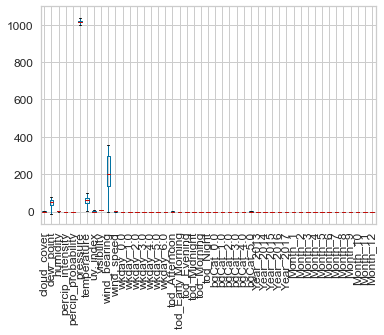

In [80]:
boxplot = X1.boxplot(rot=90, fontsize=12)

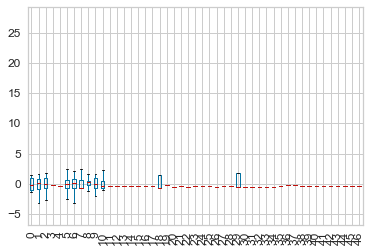

In [81]:
boxplot = X1_scaled.boxplot(rot=90, fontsize=12)

In [82]:
X2 = data3.drop(columns = ['CrimeRate', 'CrimeCategory', 'bgCat_0.0', 'bgCat_1.0', 'bgCat_2.0', 'bgCat_3.0', 'bgCat_4.0', 'bgCat_5.0', 'day', 'Date'])
scaler = preprocessing.StandardScaler()
X2_scaled = scaler.fit(X2).transform(X2)
X2_scaled = pd.DataFrame(X2_scaled)

In [138]:
print (X2.columns)

Index(['cloud_cover', 'dew_point', 'humidity', 'percip_intensity',
       'percip_probability', 'pressure', 'temperature', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'BlockGroupFreq',
       'wkday_0.0', 'wkday_1.0', 'wkday_2.0', 'wkday_3.0', 'wkday_4.0',
       'wkday_5.0', 'wkday_6.0', 'tod_Afternoon', 'tod_Early Morning',
       'tod_Evening', 'tod_Midnight', 'tod_Morning', 'tod_Night', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')


In [139]:
X2_scaled.columns = ['cloud_cover', 'dew_point', 'humidity', 'percip_intensity',
       'percip_probability', 'pressure', 'temperature', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'BlockGroupFreq',
       'wkday_0.0', 'wkday_1.0', 'wkday_2.0', 'wkday_3.0', 'wkday_4.0',
       'wkday_5.0', 'wkday_6.0', 'tod_Afternoon', 'tod_Early Morning',
       'tod_Evening', 'tod_Midnight', 'tod_Morning', 'tod_Night', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']

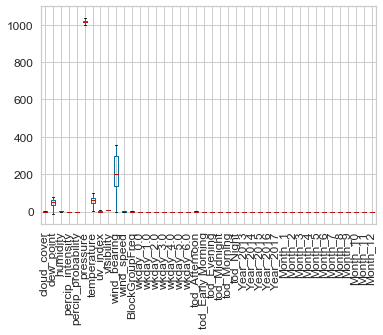

In [83]:
boxplot = X2.boxplot(rot=90, fontsize=12)

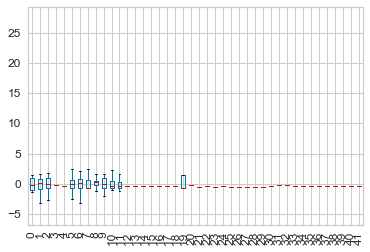

In [84]:
boxplot = X2_scaled.boxplot(rot=90, fontsize=12)

In [85]:
X3 = data3.drop(columns = ['CrimeRate', 'CrimeCategory', 'BlockGroupFreq', 'day', 'Date'])
scaler = preprocessing.StandardScaler()
X3_scaled = scaler.fit(X3).transform(X3)
X3_scaled = pd.DataFrame(X3_scaled)

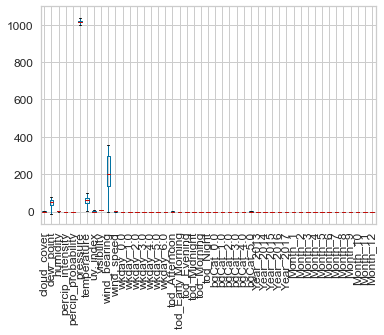

In [86]:
boxplot = X3.boxplot(rot=90, fontsize=12)

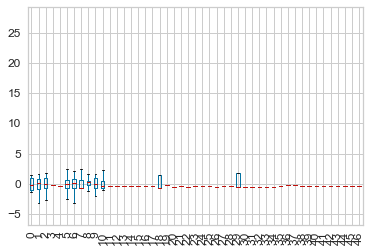

In [87]:
boxplot = X3_scaled.boxplot(rot=90, fontsize=12)

In [90]:
X1val = X1_scaled.values
X1val

array([[-0.35814398, -1.0518849 , -0.71850318, ..., -0.3149547 ,
        -0.29653657, -0.29843869],
       [ 1.4017212 ,  0.41209727,  1.49839122, ..., -0.3149547 ,
        -0.29653657, -0.29843869],
       [ 1.20923595, -1.53599056, -0.5022208 , ..., -0.3149547 ,
        -0.29653657, -0.29843869],
       ...,
       [-1.1005871 , -2.46549463, -1.42142092, ..., -0.3149547 ,
        -0.29653657,  3.35077195],
       [-1.12808499, -2.01373338, -0.55629139, ..., -0.3149547 ,
        -0.29653657,  3.35077195],
       [-1.29307235, -2.30271212, -0.66443258, ..., -0.3149547 ,
        -0.29653657,  3.35077195]])

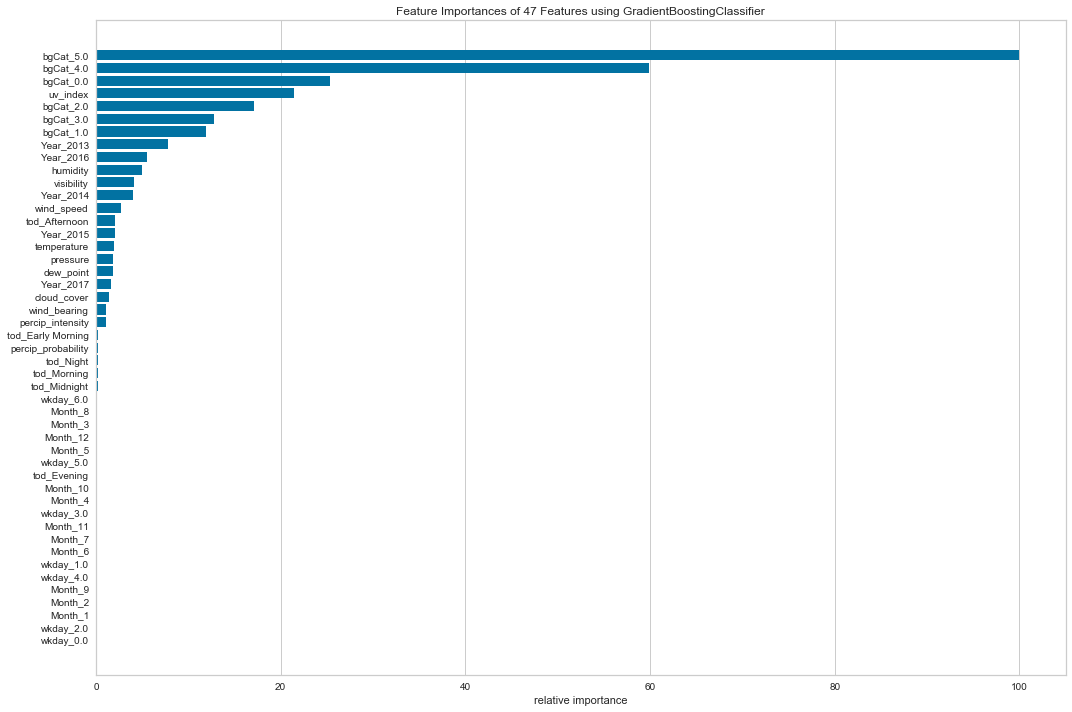

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances

viz = FeatureImportances(GradientBoostingClassifier(), size=(1080, 720))
viz.fit(X1_scaled, y2)
viz.poof()

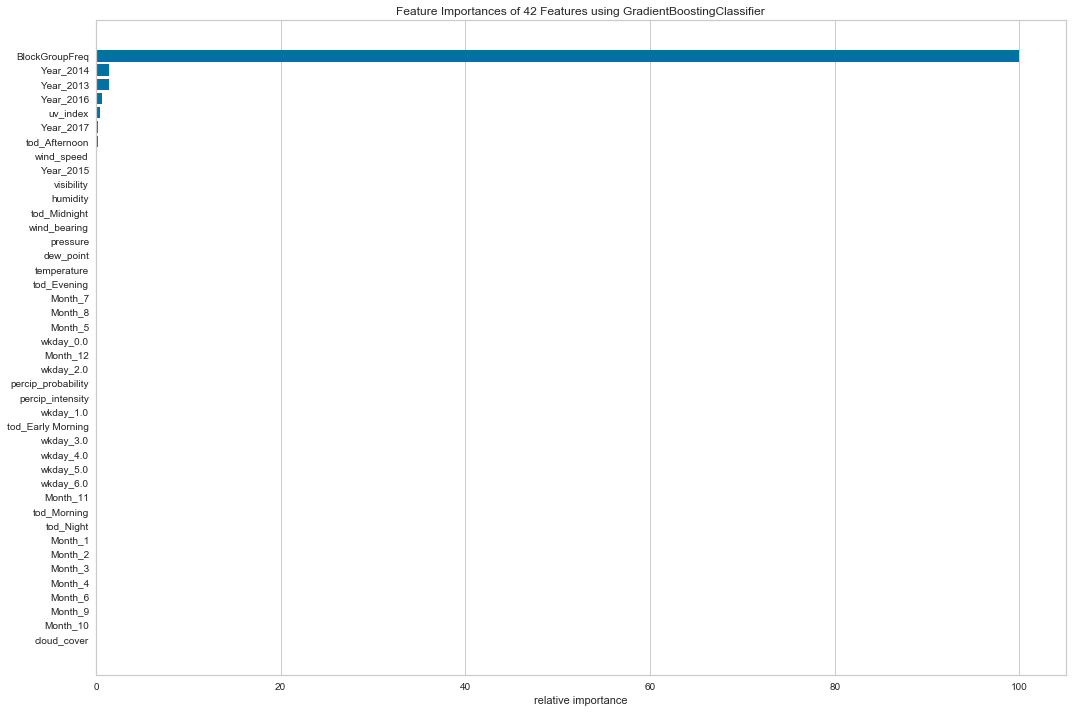

In [141]:
viz = FeatureImportances(GradientBoostingClassifier(), size=(1080, 720))
viz.fit(X1, y2)
viz.poof()

<IPython.core.display.Javascript object>


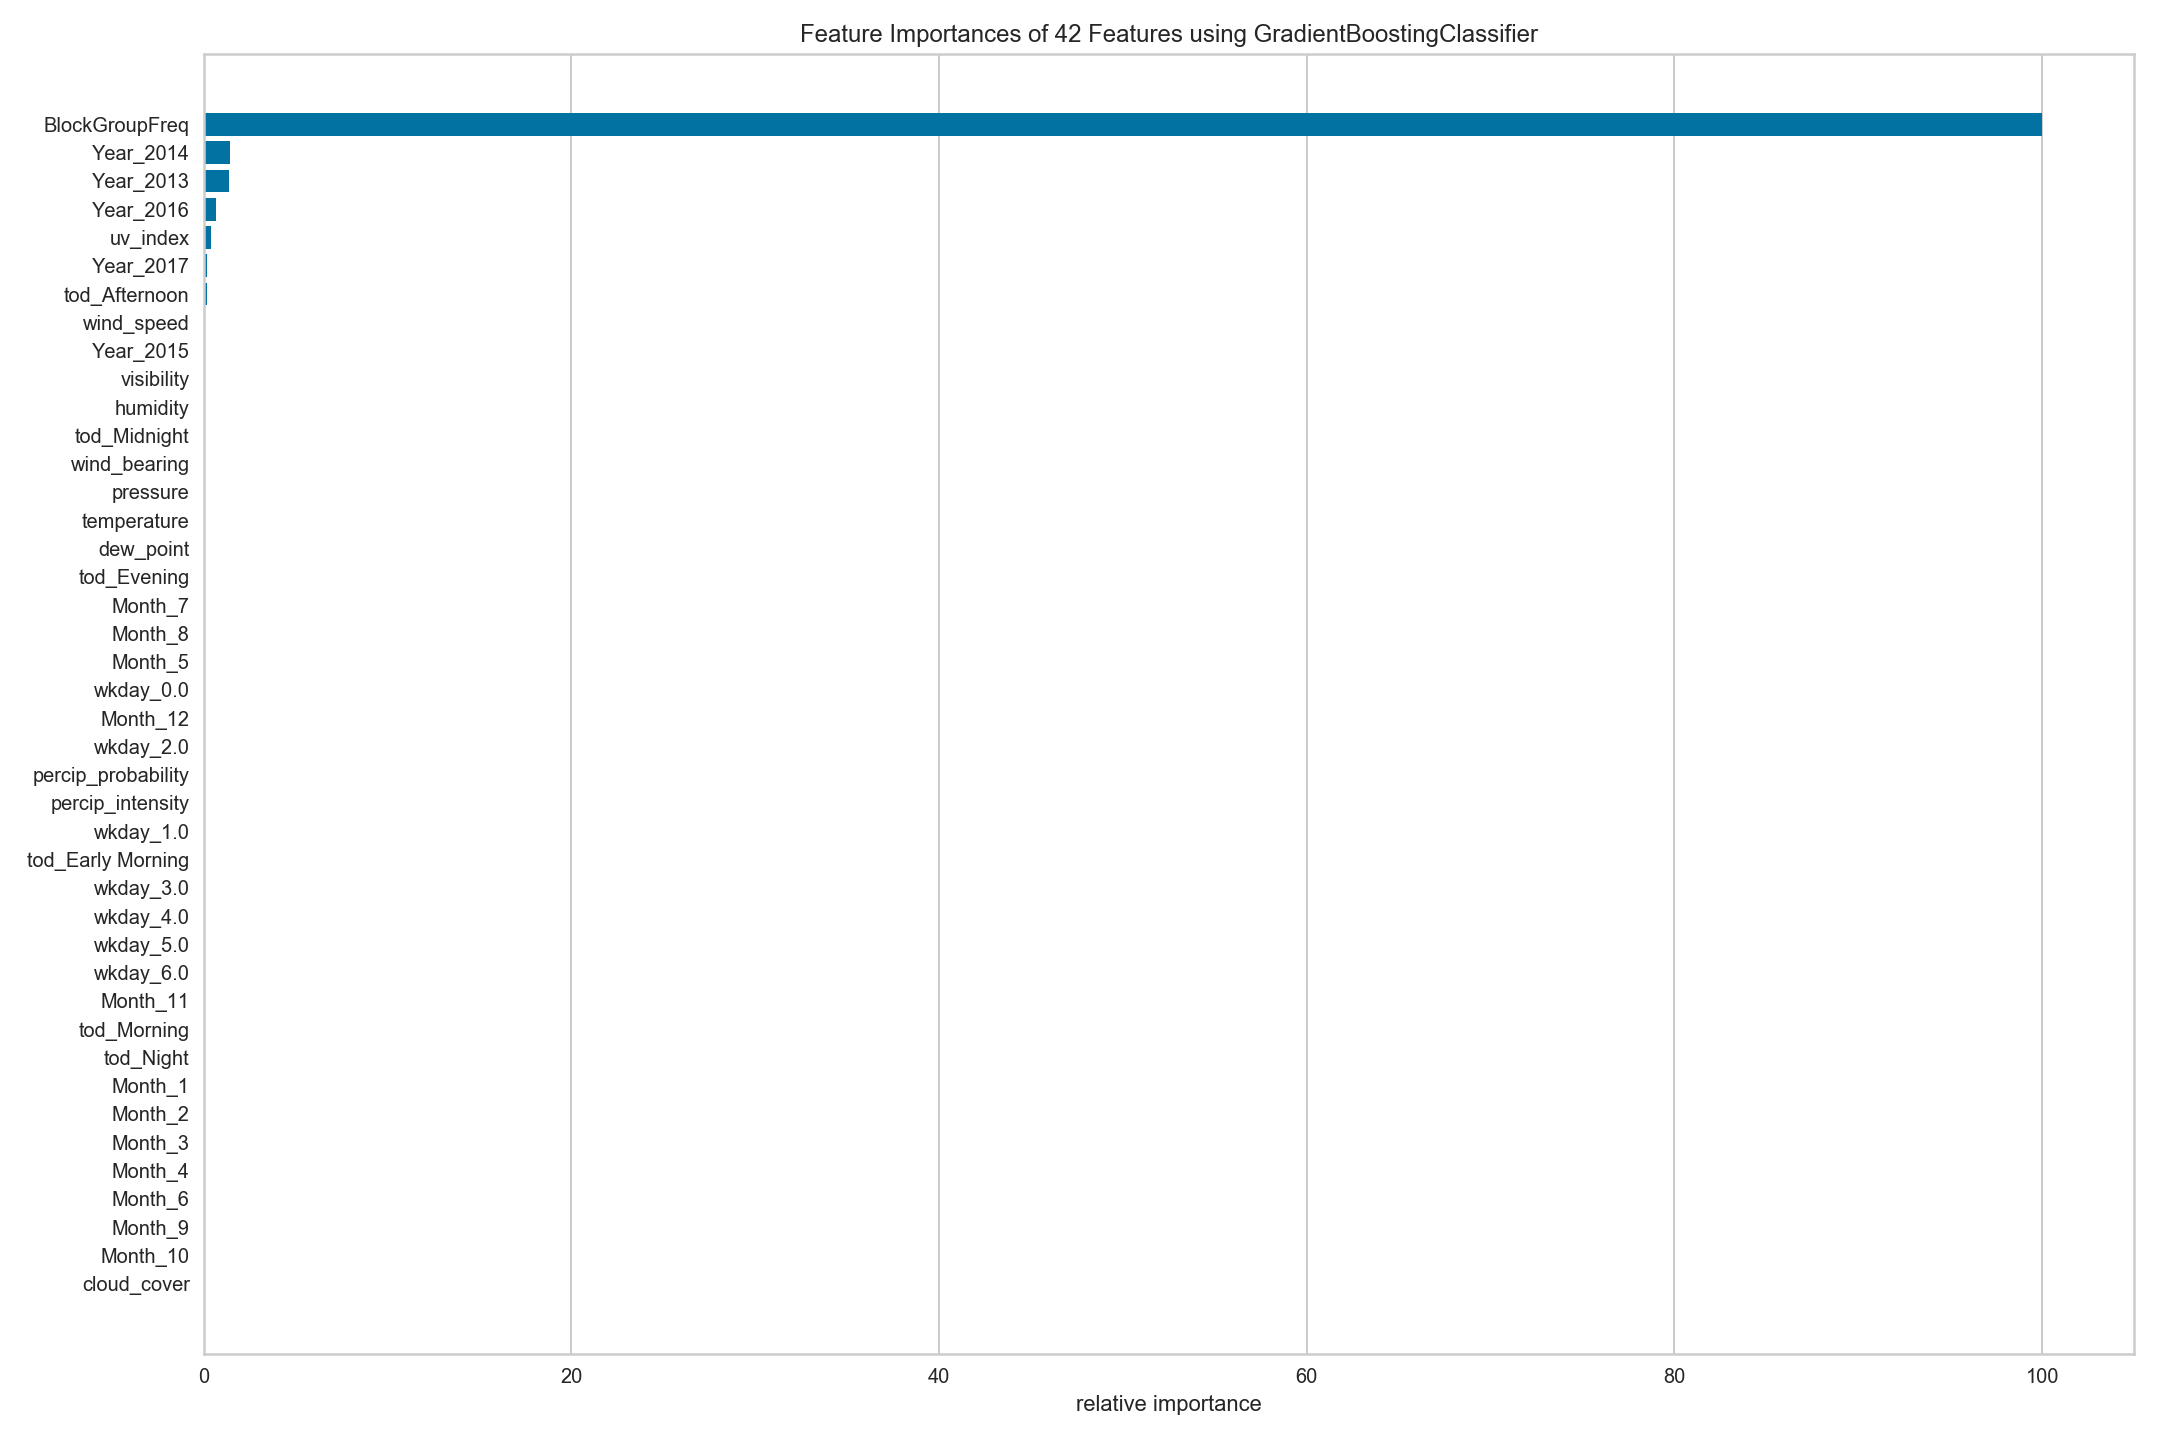

In [173]:
viz = FeatureImportances(GradientBoostingClassifier(), size=(1080, 720))
viz.fit(X2_scaled, y2)
viz.poof()

<IPython.core.display.Javascript object>


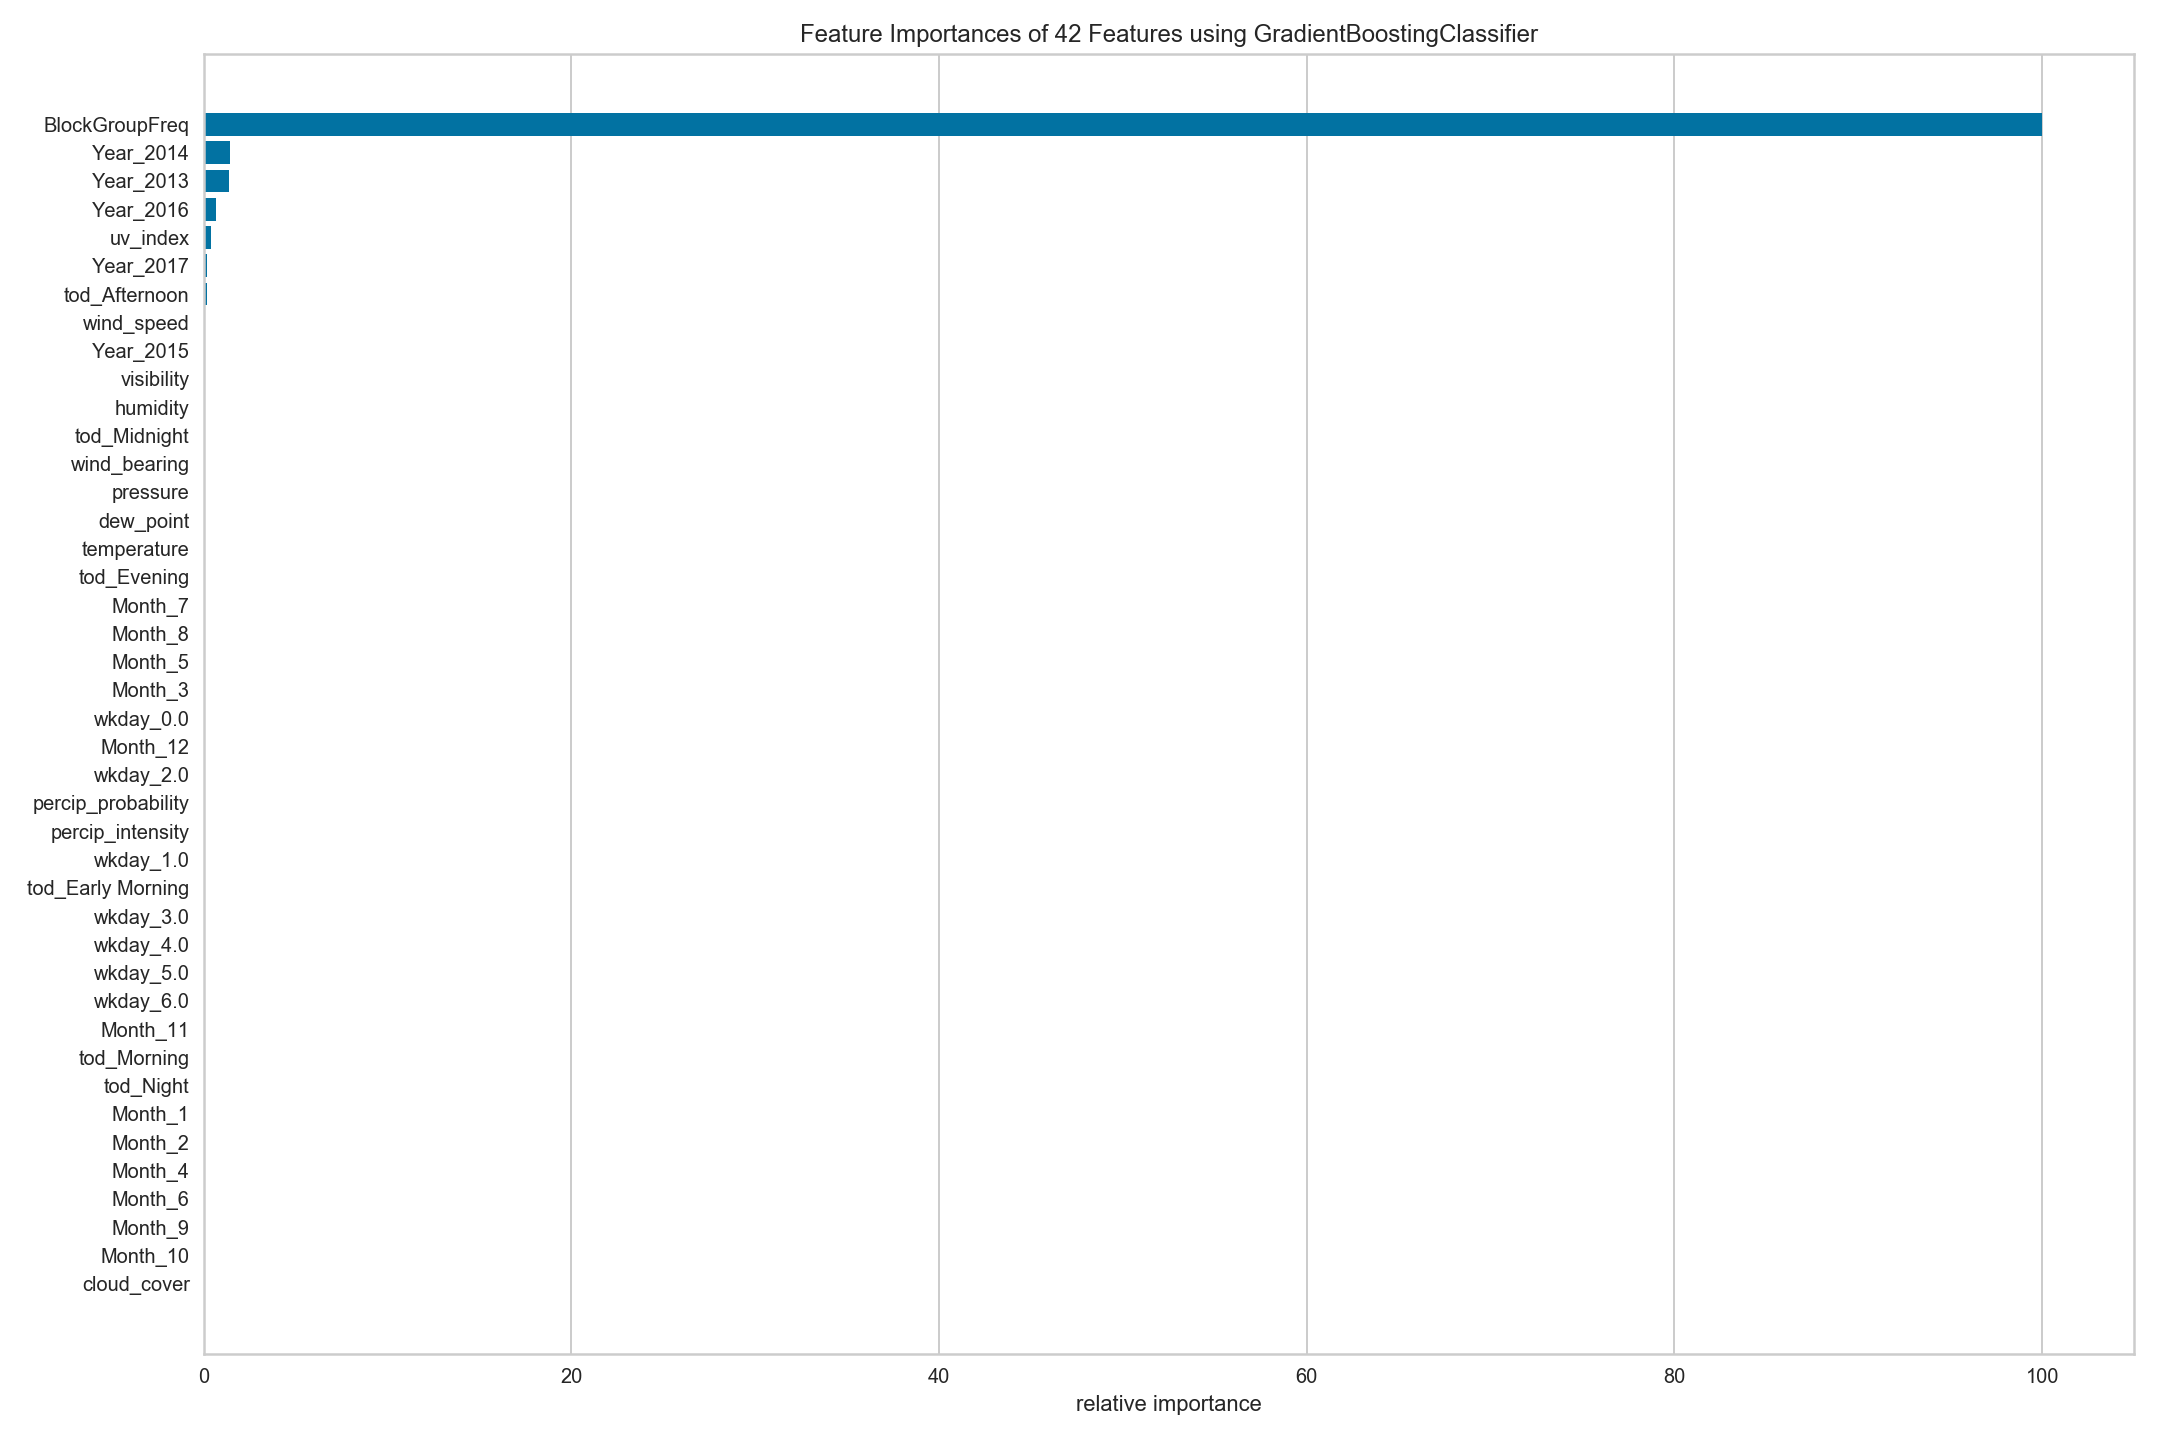

In [174]:
viz = FeatureImportances(GradientBoostingClassifier(), size=(1080, 720))
viz.fit(X2, y2)
viz.poof()

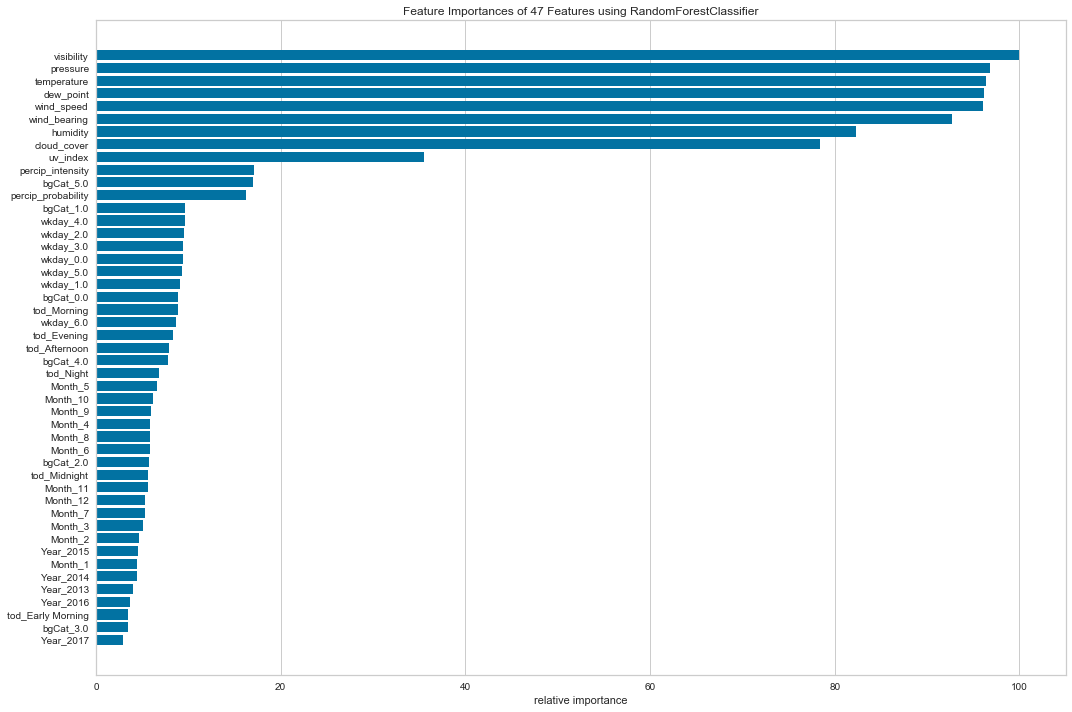

In [133]:
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X1, y2)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.poof()

In [146]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

model = ElasticNet()
model.fit(X2_scaled, y1)
featureList = list(zip(X2_scaled, model.coef_.tolist()))

In [147]:
featureList

[('cloud_cover', -0.0),
 ('dew_point', -0.0),
 ('humidity', -0.18391236138695274),
 ('percip_intensity', -0.0),
 ('percip_probability', -0.0),
 ('pressure', 0.0),
 ('temperature', 0.0),
 ('uv_index', 0.0),
 ('visibility', 0.0),
 ('wind_bearing', 0.0),
 ('wind_speed', 0.0),
 ('BlockGroupFreq', -0.24806819424221582),
 ('wkday_0.0', -0.0),
 ('wkday_1.0', 0.0),
 ('wkday_2.0', 0.0),
 ('wkday_3.0', 0.0),
 ('wkday_4.0', 0.0),
 ('wkday_5.0', -0.0),
 ('wkday_6.0', -0.0),
 ('tod_Afternoon', 1.0917043715015256),
 ('tod_Early Morning', -0.1681424062332729),
 ('tod_Evening', -0.0),
 ('tod_Midnight', -0.0),
 ('tod_Morning', -0.0),
 ('tod_Night', -0.036010035949787106),
 ('Year_2013', 0.9280557268104009),
 ('Year_2014', 0.6267370637963428),
 ('Year_2015', 0.0),
 ('Year_2016', -0.5391486149318538),
 ('Year_2017', -1.3283792322622743),
 ('Month_1', 0.0),
 ('Month_2', -0.0),
 ('Month_3', -0.0),
 ('Month_4', -0.0),
 ('Month_5', -0.0),
 ('Month_6', -0.0),
 ('Month_7', -0.0),
 ('Month_8', 0.0),
 ('Month_9'

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [151]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
    
rmf = RandomForestClassifier()
rfecv = RFECV(estimator=rmf, step=1, cv=StratifiedKFold(12), scoring='accuracy', verbose = 10, n_jobs = 1)
rfecv.fit(X2 , y2)
optimal_features = rfecv.n_features_

print("Optimal number of features : %d" % rfecv.n_features_)

Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 fe

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.


Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 feat

<IPython.core.display.Javascript object>


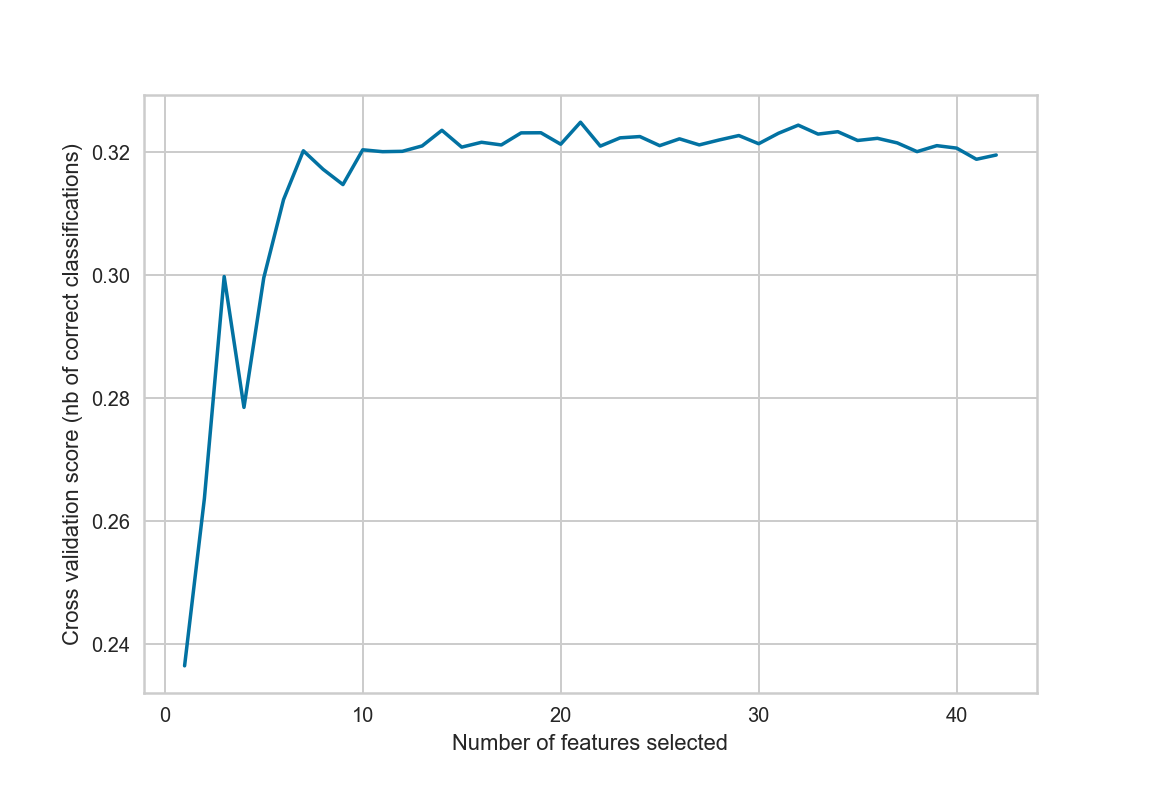

In [155]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [157]:
import pickle

#with open('filename.pickle', 'wb') as handle:
#    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('OptimalFeatures.pickle', 'wb') as features:
        pickle.dump([optimal_features, rfecv] , features)

<IPython.core.display.Javascript object>


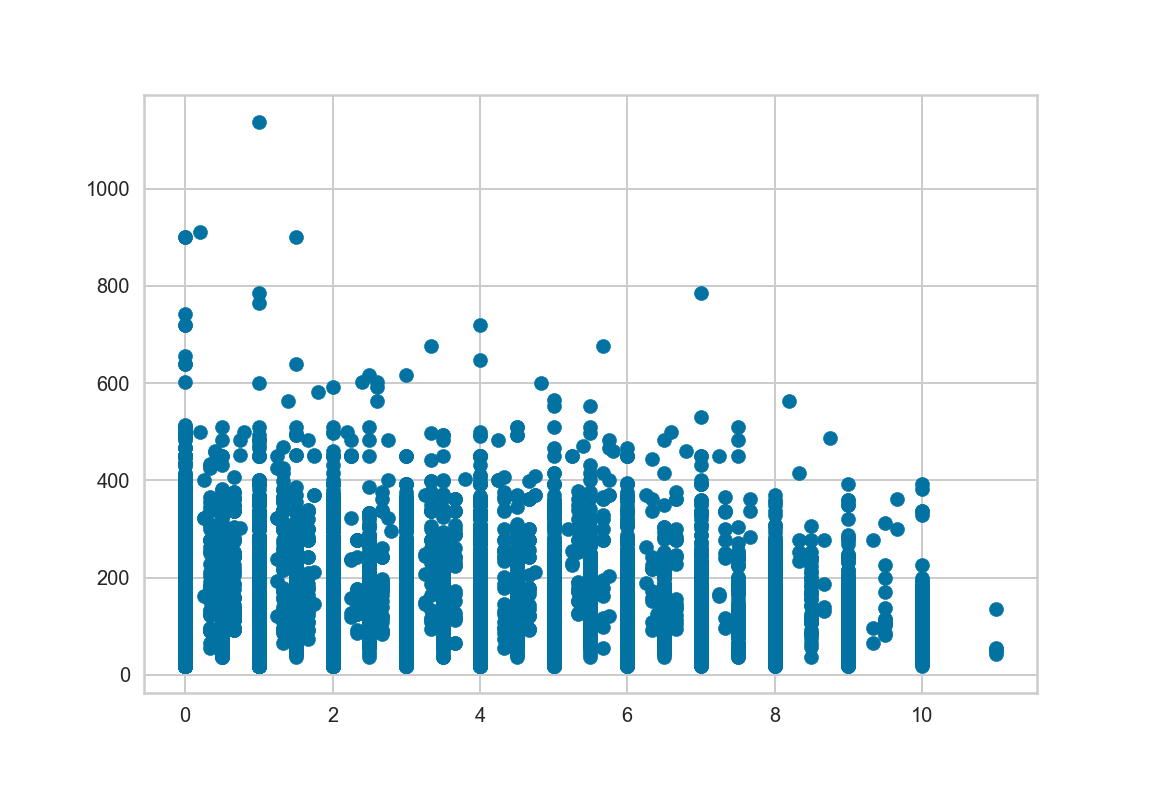

In [172]:
le = preprocessing.LabelEncoder()
le.fit(y2)
yle = le.transform(y2) 

plt.scatter(data['uv_index'], data['CrimeRate'])
plt.show()

<IPython.core.display.Javascript object>


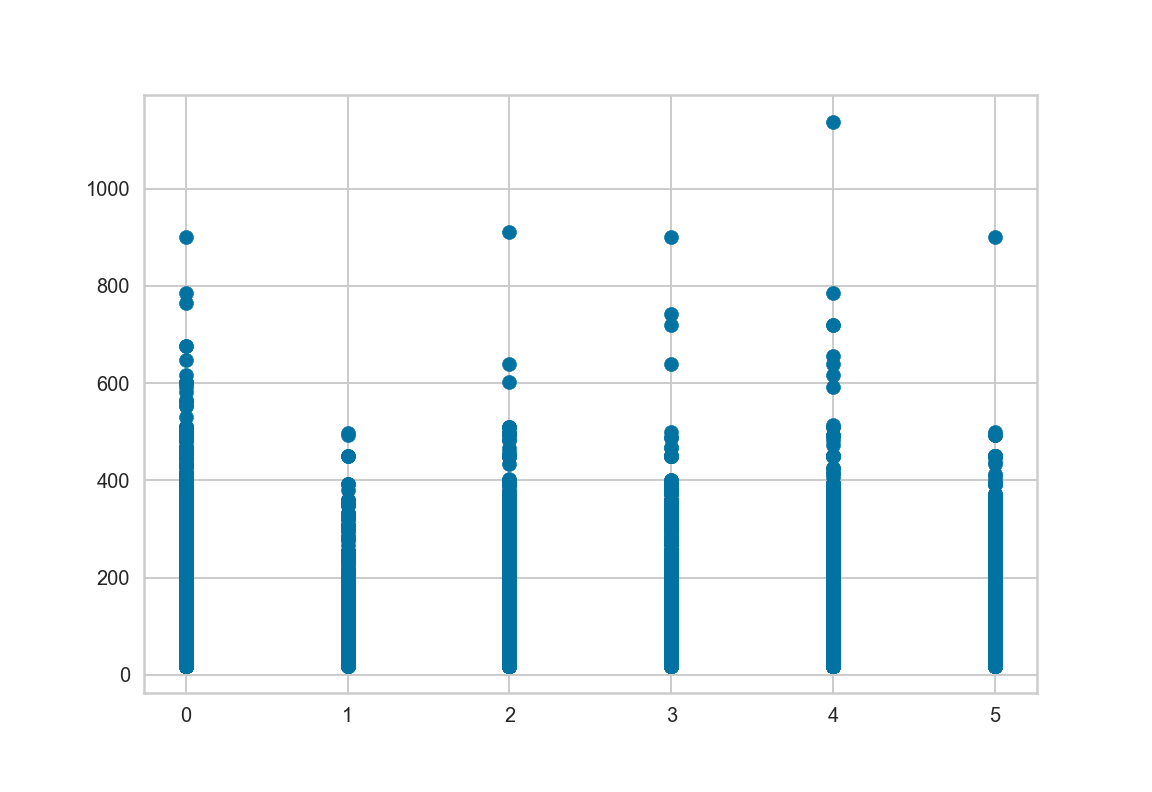

In [167]:
le = preprocessing.LabelEncoder()
le.fit(data['tod'])
tod_le = le.transform(data['tod']) 

plt.scatter(tod_le, data['CrimeRate'])
plt.show()

In [171]:
data['CrimeRate'].describe()

count    157040.000000
mean         81.915292
std          48.948227
min          18.494544
25%          50.890585
50%          69.589422
75%         100.100100
max        1136.363636
Name: CrimeRate, dtype: float64

In [ ]:
with open('Pickle/mypickle.pickle', 'wb') as f:
    pickle.dump(X1, f)
    
df.to_pickle('my_df.pickle')

In [175]:
print (X1.columns)

Index(['cloud_cover', 'dew_point', 'humidity', 'percip_intensity',
       'percip_probability', 'pressure', 'temperature', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'wkday_0.0', 'wkday_1.0',
       'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
       'tod_Afternoon', 'tod_Early Morning', 'tod_Evening', 'tod_Midnight',
       'tod_Morning', 'tod_Night', 'bgCat_0.0', 'bgCat_1.0', 'bgCat_2.0',
       'bgCat_3.0', 'bgCat_4.0', 'bgCat_5.0', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12'],
      dtype='object')


In [ ]:
y1 = data3.CrimeRate
y2 = data3.CrimeCategory

In [176]:
X1_ML = X1.drop(columns = ['wkday_0.0', 'wkday_1.0', 'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
                           'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 
                           'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 
                           'tod_Early Morning', 'tod_Morning', 'tod_Afternoon', 'tod_Evening', 'tod_Night', 'tod_Midnight'])

In [177]:
X1_Scaled_ML = X1_scaled.drop(columns = ['wkday_0.0', 'wkday_1.0', 'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
                           'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 
                           'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 
                           'tod_Early Morning', 'tod_Morning', 'tod_Afternoon', 'tod_Evening', 'tod_Night', 'tod_Midnight'])

In [181]:
X2_ML = X2.drop(columns = ['wkday_0.0', 'wkday_1.0', 'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
                           'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 
                           'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 
                           'tod_Early Morning', 'tod_Morning', 'tod_Afternoon', 'tod_Evening', 'tod_Night', 'tod_Midnight'])

In [182]:
X2_Scaled_ML = X2_scaled.drop(columns = ['wkday_0.0', 'wkday_1.0', 'wkday_2.0', 'wkday_3.0', 'wkday_4.0', 'wkday_5.0', 'wkday_6.0',
                           'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 
                           'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 
                           'tod_Early Morning', 'tod_Morning', 'tod_Afternoon', 'tod_Evening', 'tod_Night', 'tod_Midnight'])

In [180]:
with open('Pickle/y1.pickle', 'wb') as f:
    pickle.dump(y1, f)
    
with open('Pickle/y2.pickle', 'wb') as f:
    pickle.dump(y2, f)
    
X1_ML.to_pickle('Pickle/X1_ML.pickle')
X1_Scaled_ML.to_pickle('Pickle/X1_Scaled_ML.pickle')

In [183]:
X2_ML.to_pickle('Pickle/X2_ML.pickle')
X2_Scaled_ML.to_pickle('Pickle/X2_Scaled_ML.pickle')

In [186]:
X2_test = X2_scaled[['BlockGroupFreq', 'temperature', 'tod_Early Morning', 'tod_Morning', 'tod_Afternoon', 'tod_Evening', 
                     'tod_Night', 'tod_Midnight', 'uv_index']].copy()

In [187]:
X2_test.to_pickle('Pickle/X2_Test.pickle')